In [9]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

In [10]:
# Pull and read data files for Census and Zillow by Year
zillow_data = pd.read_csv("Output/zillow_by_year.csv") #--based on neighborhood!! includes zipcodes!!
census_data = pd.read_csv("Output/census_data.csv")

# Pull and read data files for All RVA and for each selected Neighborhood
allRVA_data = pd.read_csv("Output/richmond.csv")
manchester_data = pd.read_csv("Output/manchester2.csv")
oregon_hill_data = pd.read_csv("Output/oregon_hill2.csv")
scotts_addition_data =pd.read_csv("Output/scotts_addition2.csv")
jackson_ward_data = pd.read_csv("Output/jackson_ward2.csv")
shockoe_bottom_data = pd.read_csv("Output/shockoe_bottom2.csv")
church_hill_data = pd.read_csv("Output/church_hill2.csv")
church_hill_north_data = pd.read_csv("Output/church_hill_north2.csv")
crimeType_data = pd.read_csv("Output/crime_type_data2.csv")
scatter_data = pd.read_csv("Output/scatter_data.csv")
scatter_data2 = pd.read_csv("Output/scatter_data2.csv")
percent_Change_data = pd.read_csv("Output/percent_change.csv")


## Scatter with Regression Analysis -- All RVA Housing Value vs All RVA Crime 
Create a scatter plot (with regression line) that depicts the relationship between housing value and total crime for all neighborhoods in Richmond.

In [11]:
# Display scatter_data for preview
print(scatter_data.columns)
scatter_data

# Fix dataframe to only include relevant columns
scatter_data = scatter_data.drop(columns=['Unnamed: 0'])

# Display fixed dataframe
scatter_data

Index(['Unnamed: 0', 'NEIGHBORHOOD_NAME', '2000_TOTAL_CRIME',
       '2000_AVERAGE_HOUSE_PRICE', '2010_TOTAL_CRIME',
       '2010_AVERAGE_HOUSE_PRICE', '2020_TOTAL_CRIME',
       '2020_AVERAGE_HOUSE_PRICE'],
      dtype='object')


,NEIGHBORHOOD_NAME,2000_TOTAL_CRIME,2000_AVERAGE_HOUSE_PRICE,2010_TOTAL_CRIME,2010_AVERAGE_HOUSE_PRICE,2020_TOTAL_CRIME,2020_AVERAGE_HOUSE_PRICE
0,BEAUFONT,81,91484,95,129220,80,179741
1,BELLEMEADE,846,60970,632,73785,484,110851
2,BELLEVUE,236,142984,106,242895,143,356034
3,BELMONT WOODS,28,119901,32,149921,16,199649
4,BELT CENTER,715,75425,417,106461,465,142836
...,...,...,...,...,...,...,...
117,WINDSOR FARMS,44,568122,18,837668,31,1098946
118,WOODHAVEN,122,75706,171,114064,126,155251
119,WOODLAND HEIGHTS,379,117137,315,222521,221,331597
120,WOODVILLE,142,138552,161,105910,139,144709


In [12]:
# Update parameters so that font size is set to 11
plt.rcParams.update({'font.size': 11})

The correlation between total crime and average housing value in 2000 is -0.15
The coefficient of determination is 0.02
The equation of the regression line is y = -36.24x + 133511.15


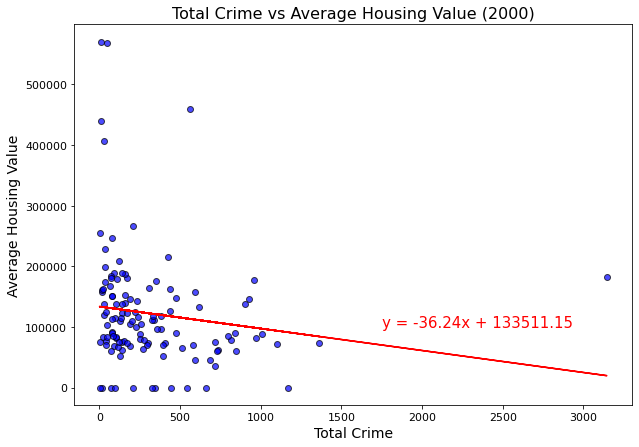

The correlation between total crime and average housing value in 2010 is -0.2
The coefficient of determination is 0.04
The equation of the regression line is y = -95.66x + 220005.63


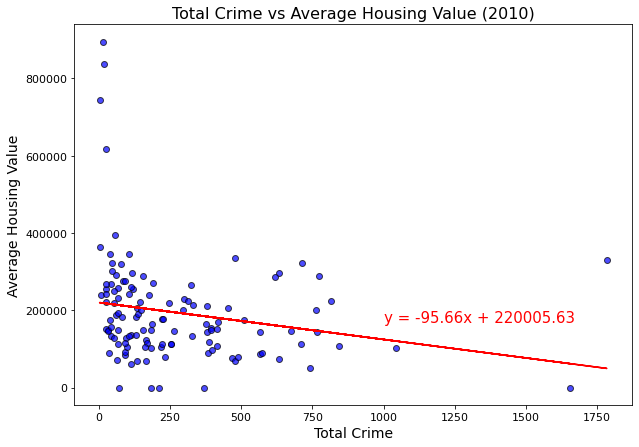

The correlation between total crime and average housing value in 2020 is -0.21
The coefficient of determination is 0.05
The equation of the regression line is y = -171.18x + 313786.07


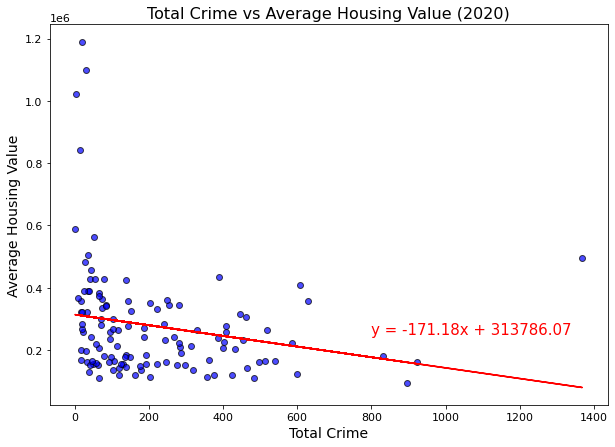

In [13]:
# Create scatter plot for Total Crime vs Average House Price 
### with data for all Richmond neighborhoods (from ONE year)

#---- Scatter for 2000 ----#

# Calculate the correlation coeficient and create the regression line and equation 
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_data['2000_TOTAL_CRIME'],
                                                        scatter_data['2000_AVERAGE_HOUSE_PRICE'])
regressLine = scatter_data['2000_TOTAL_CRIME'] * slope + intercept
regressEq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print out the results
print(f'The correlation between total crime and average housing value in 2000 is {round(rvalue,2)}')
print(f"The coefficient of determination is {round(rvalue**2,2)}")
print(f"The equation of the regression line is {regressEq}")

# Set up the plot figure
fig = plt.figure(figsize=(10,7))

# Plot the data for the scatter plot and regression line, add annotation for the regression equation
plt.scatter(scatter_data['2000_TOTAL_CRIME'], scatter_data['2000_AVERAGE_HOUSE_PRICE'], 
            marker='o', facecolors='blue', edgecolors='black', alpha=.7)
plt.plot(scatter_data['2000_TOTAL_CRIME'], regressLine, 'r-')
plt.annotate(regressEq, (1750,100000), fontsize=15, color='red')

# Add appropriate title and axis labels
plt.title('Total Crime vs Average Housing Value (2000)', fontsize=16)
plt.xlabel('Total Crime', fontsize=14)
plt.ylabel('Average Housing Value', fontsize=14)
plt.show()

#---- Scatter for 2010 ----#

# Repeat same process as above...
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_data['2010_TOTAL_CRIME'],
                                                        scatter_data['2010_AVERAGE_HOUSE_PRICE'])
regressLine = scatter_data['2010_TOTAL_CRIME'] * slope + intercept
regressEq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The correlation between total crime and average housing value in 2010 is {round(rvalue,2)}')
print(f"The coefficient of determination is {round(rvalue**2,2)}")
print(f"The equation of the regression line is {regressEq}")

fig = plt.figure(figsize=(10,7))
plt.scatter(scatter_data['2010_TOTAL_CRIME'], scatter_data['2010_AVERAGE_HOUSE_PRICE'], 
            marker='o', facecolors='blue', edgecolors='black', alpha=.7)
plt.plot(scatter_data['2010_TOTAL_CRIME'], regressLine, 'r-')
plt.annotate(regressEq, (1000,170000), fontsize=15, color='red')
plt.title('Total Crime vs Average Housing Value (2010)', fontsize=16)
plt.xlabel('Total Crime', fontsize=14)
plt.ylabel('Average Housing Value', fontsize=14)
plt.show()

#---- Scatter for 2020 ----#

# Repeat same process as above...
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_data['2020_TOTAL_CRIME'],
                                                        scatter_data['2020_AVERAGE_HOUSE_PRICE'])
regressLine = scatter_data['2020_TOTAL_CRIME'] * slope + intercept
regressEq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The correlation between total crime and average housing value in 2020 is {round(rvalue,2)}')
print(f"The coefficient of determination is {round(rvalue**2,2)}")
print(f"The equation of the regression line is {regressEq}")

fig = plt.figure(figsize=(10,7))
plt.scatter(scatter_data['2020_TOTAL_CRIME'], scatter_data['2020_AVERAGE_HOUSE_PRICE'], 
            marker='o', facecolors='blue', edgecolors='black', alpha=.7)
plt.plot(scatter_data['2020_TOTAL_CRIME'], regressLine, 'r-')
plt.annotate(regressEq, (800,250000), fontsize=15, color='red')
plt.title('Total Crime vs Average Housing Value (2020)', fontsize=16)
plt.xlabel('Total Crime', fontsize=14)
plt.ylabel('Average Housing Value', fontsize=14)
plt.show()

### --DECIDED THAT THESE GRAPHS WERE NOT AS VALUABLE AS SCATTER PLOT OF YEARLY MEANS

In [184]:
# Display scatter_data2 for preview
print(scatter_data2.columns)
scatter_data2

Index(['NEIGHBORHOOD_NAME', '2000_TOTAL_CRIME', '2001_TOTAL_CRIME',
       '2002_TOTAL_CRIME', '2003_TOTAL_CRIME', '2004_TOTAL_CRIME',
       '2005_TOTAL_CRIME', '2006_TOTAL_CRIME', '2007_TOTAL_CRIME',
       '2008_TOTAL_CRIME', '2009_TOTAL_CRIME', '2010_TOTAL_CRIME',
       '2011_TOTAL_CRIME', '2012_TOTAL_CRIME', '2013_TOTAL_CRIME',
       '2014_TOTAL_CRIME', '2015_TOTAL_CRIME', '2016_TOTAL_CRIME',
       '2017_TOTAL_CRIME', '2018_TOTAL_CRIME', '2019_TOTAL_CRIME',
       '2020_TOTAL_CRIME', 'MEAN_TOTAL_CRIME', '2000_AVERAGE_HOUSE_PRICE',
       '2001_AVERAGE_HOUSE_PRICE', '2002_AVERAGE_HOUSE_PRICE',
       '2003_AVERAGE_HOUSE_PRICE', '2004_AVERAGE_HOUSE_PRICE',
       '2005_AVERAGE_HOUSE_PRICE', '2006_AVERAGE_HOUSE_PRICE',
       '2007_AVERAGE_HOUSE_PRICE', '2008_AVERAGE_HOUSE_PRICE',
       '2009_AVERAGE_HOUSE_PRICE', '2010_AVERAGE_HOUSE_PRICE',
       '2011_AVERAGE_HOUSE_PRICE', '2012_AVERAGE_HOUSE_PRICE',
       '2013_AVERAGE_HOUSE_PRICE', '2014_AVERAGE_HOUSE_PRICE',
       '2015_A

,NEIGHBORHOOD_NAME,2000_TOTAL_CRIME,2001_TOTAL_CRIME,2002_TOTAL_CRIME,2003_TOTAL_CRIME,2004_TOTAL_CRIME,2005_TOTAL_CRIME,2006_TOTAL_CRIME,2007_TOTAL_CRIME,2008_TOTAL_CRIME,...,2012_AVERAGE_HOUSE_PRICE,2013_AVERAGE_HOUSE_PRICE,2014_AVERAGE_HOUSE_PRICE,2015_AVERAGE_HOUSE_PRICE,2016_AVERAGE_HOUSE_PRICE,2017_AVERAGE_HOUSE_PRICE,2018_AVERAGE_HOUSE_PRICE,2019_AVERAGE_HOUSE_PRICE,2020_AVERAGE_HOUSE_PRICE,MEAN_TOTAL_HOUSE_PRICE
0,BEAUFONT,81,73,84,99,114,72,129,119,98,...,116402,113647,110738,115794,133430,136345,149896,161228,179741,128859.000000
1,BELLEMEADE,846,770,700,681,659,650,793,760,765,...,60356,61080,65558,59610,58628,65129,79389,93220,110851,72656.238095
2,BELLEVUE,236,160,155,173,124,122,135,100,122,...,237716,251652,257725,266497,282936,300601,320885,335723,356034,247759.095238
3,BELMONT WOODS,28,27,24,12,31,27,53,41,27,...,124702,122213,130302,136354,142739,150620,168113,177865,199649,145213.476190
4,BELT CENTER,715,756,550,569,446,417,452,420,468,...,85432,76923,81764,82464,77722,88260,97496,113206,142836,93103.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,WINDSOR FARMS,44,42,90,26,35,33,30,47,43,...,823875,881713,883240,888073,925445,953437,994608,1050626,1098946,855789.428571
116,WOODHAVEN,122,165,140,127,161,187,195,243,169,...,86105,98527,90518,99146,107985,114328,125116,129594,155251,106224.000000
117,WOODLAND HEIGHTS,379,552,541,376,342,332,338,282,233,...,206450,217644,217463,236378,249152,269610,288871,307341,331597,218927.380952
118,WOODVILLE,142,131,166,148,144,132,148,145,142,...,100255,85785,76264,82503,78151,83901,97534,125285,144709,115771.095238


The correlation between mean total crime and average housing value from 2000-2020 is -0.18
The coefficient of determination is 0.03
The equation of the regression line is y = -85.68x + 214727.18


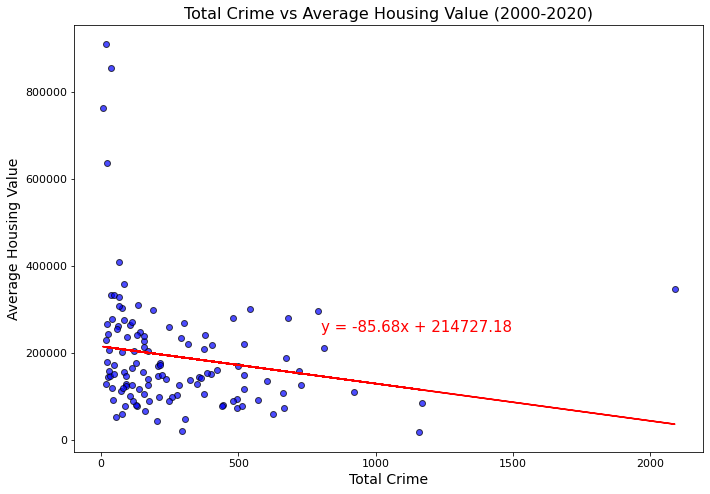

In [201]:
# Create scatter plot for Total Crime vs Average House Price 
### with yearly means for all Richmond neighborhoods (from 2000-2020)

# Repeat same process as above...
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_data2['MEAN_TOTAL_CRIME'],
                                                        scatter_data2['MEAN_TOTAL_HOUSE_PRICE'])
regressLine = scatter_data2['MEAN_TOTAL_CRIME'] * slope + intercept
regressEq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The correlation between mean total crime and average housing value from 2000-2020 is {round(rvalue,2)}')
print(f"The coefficient of determination is {round(rvalue**2,2)}")
print(f"The equation of the regression line is {regressEq}")

fig = plt.figure(figsize=(10,7))
plt.scatter(scatter_data2['MEAN_TOTAL_CRIME'], scatter_data2['MEAN_TOTAL_HOUSE_PRICE'], 
            marker='o', facecolors='blue', edgecolors='black', alpha=.7)
plt.plot(scatter_data2['MEAN_TOTAL_CRIME'], regressLine, 'r-')
plt.annotate(regressEq, (800,250000), fontsize=15, color='red')
plt.title('Total Crime vs Average Housing Value (2000-2020)', fontsize=16)
plt.xlabel('Total Crime', fontsize=14)
plt.ylabel('Average Housing Value', fontsize=14)

# Add tight layout
plt.tight_layout()

# Save figure as a png and display in the terminal
plt.savefig('Output/Images/TotalCrimevsAverageHousingValue_scatter.png')
plt.show()

## Comparative Bar Graphs for Crime
Create stacked bar graph displaying the total crime in 2000 and 2020 for each Neighborhood, with type of crime as segments.

In [4]:
# Display crimeType_data for preview
print(crimeType_data.columns)
crimeType_data

# Fix dataframe to only include relevant columns
crimeType_data = crimeType_data[['YEAR', 'NEIGHBORHOOD_NAME', 'VIOLENT_CRIME', 'NON-VIOLENT_CRIME', 'OTHER']]

# Display fixed dataframe
crimeType_data

Index(['Unnamed: 0', 'YEAR', 'NEIGHBORHOOD_NAME', 'VIOLENT_CRIME',
       'NON-VIOLENT_CRIME', 'OTHER'],
      dtype='object')


,YEAR,NEIGHBORHOOD_NAME,VIOLENT_CRIME,NON-VIOLENT_CRIME,OTHER
0,2000,RICHMOND AVERAGE,49.463087,125.402685,144.818792
1,2020,RICHMOND AVERAGE,27.416107,60.798658,110.013423
2,2000,MANCHESTER,49.000000,113.000000,130.000000
3,2020,MANCHESTER,19.000000,105.000000,144.000000
4,2000,OREGON HILL,23.000000,48.000000,62.000000
5,2020,OREGON HILL,7.000000,35.000000,62.000000
6,2000,SCOTT'S ADDITION,34.000000,247.000000,147.000000
7,2020,SCOTT'S ADDITION,20.000000,96.000000,134.000000
8,2000,JACKSON WARD,101.000000,396.000000,344.000000
9,2020,JACKSON WARD,43.000000,209.000000,267.000000


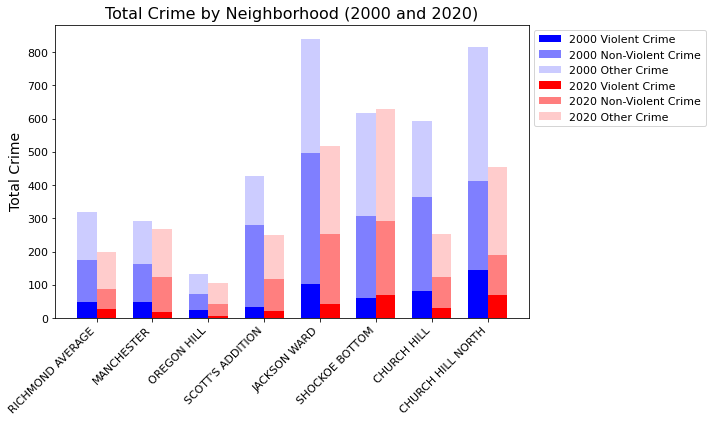

In [187]:
# Create separate subset dataframes for the year 2000 and 2020 from crimeType_data
### --set index to NEIGHBORHOOD_NAME and take out YEAR so it doesn't get plotted 
year2000 = crimeType_data[crimeType_data['YEAR'] == 2000].set_index('NEIGHBORHOOD_NAME')
year2000_fix = year2000[['VIOLENT_CRIME','NON-VIOLENT_CRIME','OTHER']]

year2020 = crimeType_data[crimeType_data['YEAR'] == 2020].set_index('NEIGHBORHOOD_NAME')
year2020_fix = year2020[['VIOLENT_CRIME','NON-VIOLENT_CRIME','OTHER']]

### --Checks:
#print(year2000_fix)
#print(year2020_fix)

# Create list for neighborhood name labels
labels = crimeType_data['NEIGHBORHOOD_NAME'].unique()

# Set up the plot figure
fig = plt.subplots(1, figsize=(10,6))

# Set the bar width and positions for the 2000 and 2020 bars 
### --will be grouped by neighborhood
bar_width = 0.35
Y2000_bar_positions = np.arange(len(year2000.index))
Y2020_bar_positions = Y2000_bar_positions + bar_width

# Create a bar graph for each crime type segment for 2000 and 2020
### --adjust position of the bottom point for each bar segment after violent crime to start at the prior bar's end
violentCrime_2000_bar = plt.bar(Y2000_bar_positions, year2000_fix['VIOLENT_CRIME'],
                                bar_width, label='2000 Violent Crime', color='b')
nonviolentCrime_2000_bar = plt.bar(Y2000_bar_positions, year2000_fix['NON-VIOLENT_CRIME'],
                                   bar_width, bottom=year2000_fix['VIOLENT_CRIME'],
                                   label='2000 Non-Violent Crime', color='b', alpha=.50)
otherCrime_2000_bar = plt.bar(Y2000_bar_positions, year2000_fix['OTHER'],
                              bar_width, bottom=year2000_fix['VIOLENT_CRIME']+(year2000_fix['NON-VIOLENT_CRIME']),
                              label='2000 Other Crime', color='b', alpha=.20)
violentCrime_2020_bar = plt.bar(Y2020_bar_positions, year2020_fix['VIOLENT_CRIME'],
                                bar_width, label='2020 Violent Crime', color='r')
nonviolentCrime_2020_bar = plt.bar(Y2020_bar_positions, year2020_fix['NON-VIOLENT_CRIME'],
                                   bar_width, bottom=year2020_fix['VIOLENT_CRIME'],
                                   label='2020 Non-Violent Crime', color='r', alpha=.50)
otherCrime_2020_bar = plt.bar(Y2020_bar_positions, year2020_fix['OTHER'],
                              bar_width, bottom=year2020_fix['VIOLENT_CRIME']+(year2020_fix['NON-VIOLENT_CRIME']),
                              label='2020 Other Crime', color='r', alpha=.20)

# Add appropriate title, axis and tick labels, legend, etc.
plt.xticks(Y2000_bar_positions+(bar_width/2), labels=labels, rotation=45, ha='right')
plt.ylabel('Total Crime', fontsize=14)
plt.title('Total Crime by Neighborhood (2000 and 2020)', fontsize=16)
plt.legend(bbox_to_anchor=(1,1), loc='upper left', ncol=1)
plt.tight_layout()

# Save the graph as a png and display in the terminal
plt.savefig('Output/Images/TotalCrimebyNeighborhood_boxplot.png')
plt.show()

## Comparative Line Graphs
Create line graphs that compare total crime and housing value in all of Richmond versus the selected gentrified neighborhoods over time.

In [16]:
# Display allRVA_data for preview (all neighborhood dataframes should have matching columns)
print(allRVA_data.columns)
allRVA_data

Index(['YEAR', 'NEIGHBORHOOD_NAME', 'HOMICIDE', 'SEX_OFFENSE', 'ROBBERY',
       'ASSAULT', 'BURGLARY', 'VICE', 'THEFT', 'VEH_THEFT', 'OTHER',
       'TOTAL_CRIME', 'AVERAGE_HOUSE_PRICE', 'CRIME_PERCENT_CHANGE',
       'PRICE_PERCENT_CHANGE'],
      dtype='object')


,YEAR,NEIGHBORHOOD_NAME,HOMICIDE,SEX_OFFENSE,ROBBERY,ASSAULT,BURGLARY,VICE,THEFT,VEH_THEFT,OTHER,TOTAL_CRIME,AVERAGE_HOUSE_PRICE,CRIME_PERCENT_CHANGE,PRICE_PERCENT_CHANGE
0,2000,Richmond,75,296,1091,5908,2841,2430,10866,2548,21578,47633,120849,0.000000,0.000000
1,2001,Richmond,67,291,1328,6341,2871,1629,10953,2762,20581,46823,125362,-1.700502,3.734597
2,2002,Richmond,83,356,1316,5718,3039,1780,12141,2537,18182,45152,133842,-3.568759,6.764060
3,2003,Richmond,88,273,1336,5699,3113,1820,10823,2890,15921,41963,148043,-7.062810,10.610351
4,2004,Richmond,90,245,1304,5351,2716,1953,8091,2369,14038,36157,162962,-13.835998,10.077603
5,2005,Richmond,83,238,1196,5239,2511,2754,8220,2214,16667,39122,185458,8.200348,13.804227
6,2006,Richmond,72,216,995,5447,2281,2937,6354,1421,19735,39458,206458,0.858852,11.323613
7,2007,Richmond,55,168,962,5334,1875,2786,5634,1240,23159,41213,221026,4.447767,7.055915
8,2008,Richmond,31,158,772,4980,1748,2690,5306,1022,21739,38446,218568,-6.713901,-1.112033
9,2009,Richmond,43,152,849,5082,1584,2734,5874,978,20597,37893,202962,-1.438381,-7.140041


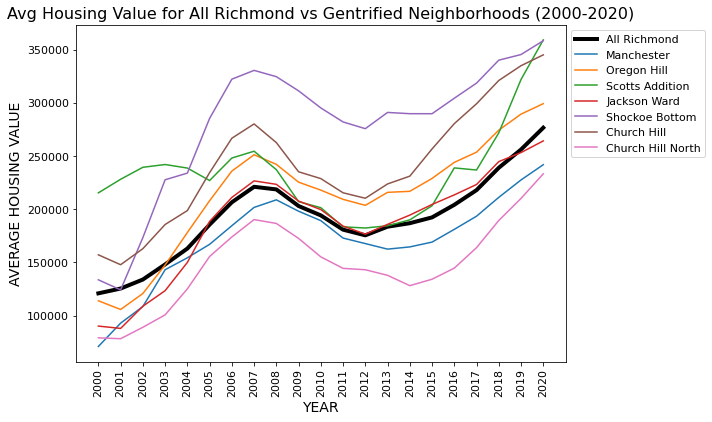

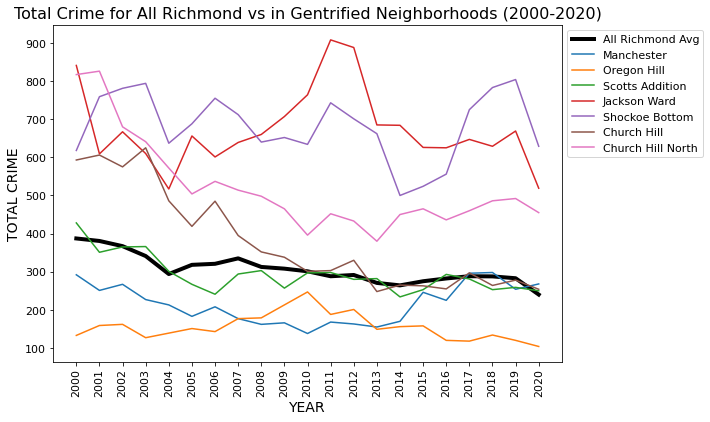

In [15]:
# Create comparative line graphs with one line for All RVA and one line for each selected neighborhood

#---- Comparative Line Graph for Housing Value ----#

# Set up the plot figure
fig = plt.subplots(figsize=(10,6))

# Plot a line graph for each dataset (All RVA and each neighborhood)
### --change the formatting for All RVA line so that it pops out more
plt.plot(allRVA_data['YEAR'], allRVA_data['AVERAGE_HOUSE_PRICE'], color='k', linewidth=4)
plt.plot(manchester_data['YEAR'], manchester_data['AVERAGE_HOUSE_PRICE'])
plt.plot(oregon_hill_data['YEAR'], oregon_hill_data['AVERAGE_HOUSE_PRICE'])
plt.plot(scotts_addition_data['YEAR'], scotts_addition_data['AVERAGE_HOUSE_PRICE'])
plt.plot(jackson_ward_data['YEAR'], jackson_ward_data['AVERAGE_HOUSE_PRICE'])
plt.plot(shockoe_bottom_data['YEAR'], shockoe_bottom_data['AVERAGE_HOUSE_PRICE'])
plt.plot(church_hill_data['YEAR'], church_hill_data['AVERAGE_HOUSE_PRICE'])
plt.plot(church_hill_north_data['YEAR'], church_hill_north_data['AVERAGE_HOUSE_PRICE'])

# Add appropriate title, axis and tick labels, legend, etc.
tick_locations = allRVA_data['YEAR']
plt.xticks(tick_locations, labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010",
                                   "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation='vertical')
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('AVERAGE HOUSING VALUE', fontsize=14)
plt.legend(['All Richmond','Manchester','Oregon Hill','Scotts Addition','Jackson Ward','Shockoe Bottom',
            'Church Hill','Church Hill North'], bbox_to_anchor=(1,1), loc='upper left', ncol=1)
plt.title(f'Avg Housing Value for All Richmond vs Gentrified Neighborhoods (2000-2020)', fontsize=16)
plt.tight_layout()

# Save the graph as a png and display in the terminal
plt.savefig('Output/Images/AvgHousingValueforAllRVAvsGentNeighborhoods_line.png')
plt.show()

#---- Comparative Line Graph for Total Crime ----#

# Fix the data from the TOTAL_CRIME column in allRVA_data to get the average total crime 
### across the 123 neighborhoods included in the dataset, put it into a new dataframe
allRVA_avgcrime = allRVA_data['TOTAL_CRIME']/123
allRVA_crimeDF = pd.DataFrame({'YEAR': allRVA_data['YEAR'],
                              'AVG_CRIME': allRVA_avgcrime})

# Repeat same process done for Housing Value...
fig = plt.subplots(figsize=(10,6))
plt.plot(allRVA_crimeDF['YEAR'], allRVA_crimeDF['AVG_CRIME'], color='k', linewidth=4)
plt.plot(manchester_data['YEAR'], manchester_data['TOTAL_CRIME'])
plt.plot(oregon_hill_data['YEAR'], oregon_hill_data['TOTAL_CRIME'])
plt.plot(scotts_addition_data['YEAR'], scotts_addition_data['TOTAL_CRIME'])
plt.plot(jackson_ward_data['YEAR'], jackson_ward_data['TOTAL_CRIME'])
plt.plot(shockoe_bottom_data['YEAR'], shockoe_bottom_data['TOTAL_CRIME'])
plt.plot(church_hill_data['YEAR'], church_hill_data['TOTAL_CRIME'])
plt.plot(church_hill_north_data['YEAR'], church_hill_north_data['TOTAL_CRIME'])

tick_locations = allRVA_data['YEAR']
plt.xticks(tick_locations, labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010", "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation='vertical')
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('TOTAL CRIME', fontsize=14)
plt.legend(['All Richmond Avg','Manchester','Oregon Hill','Scotts Addition','Jackson Ward','Shockoe Bottom','Church Hill','Church Hill North'], bbox_to_anchor=(1,1), loc='upper left', ncol=1)
plt.title(f'Total Crime for All Richmond vs in Gentrified Neighborhoods (2000-2020)', fontsize=16)
plt.tight_layout()

plt.savefig('Output/Images/TotalCrimeforAllRVAvsGentNeighborhoods_line.png')
plt.show()

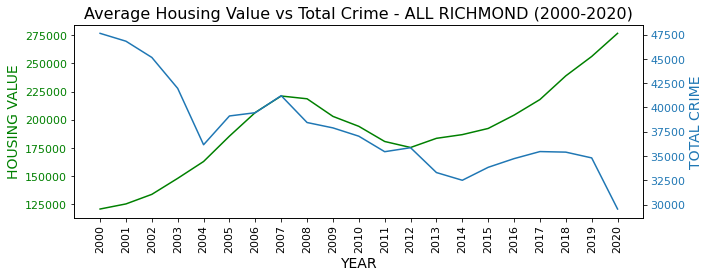

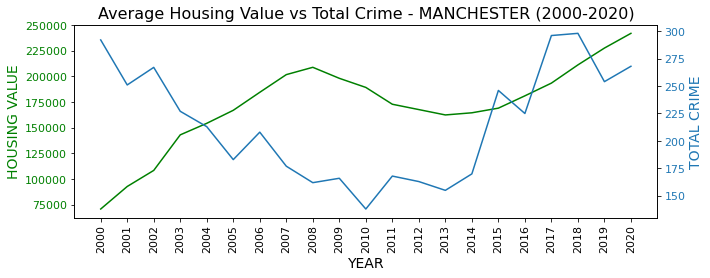

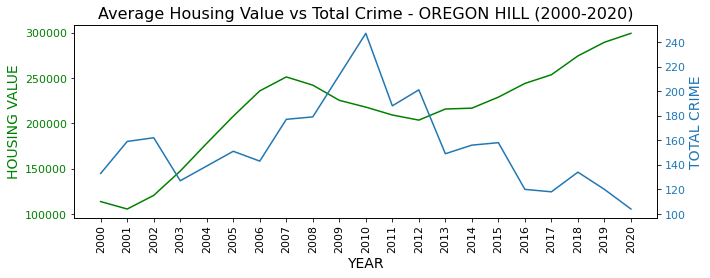

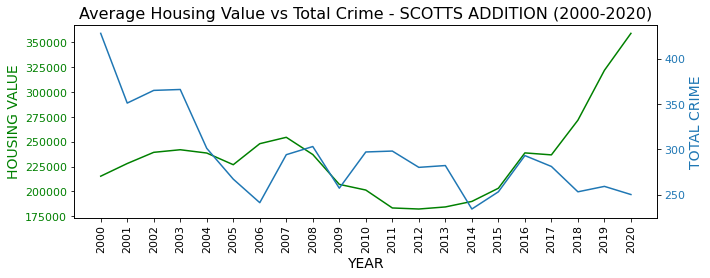

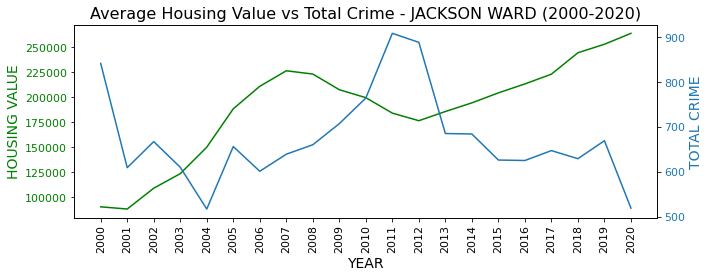

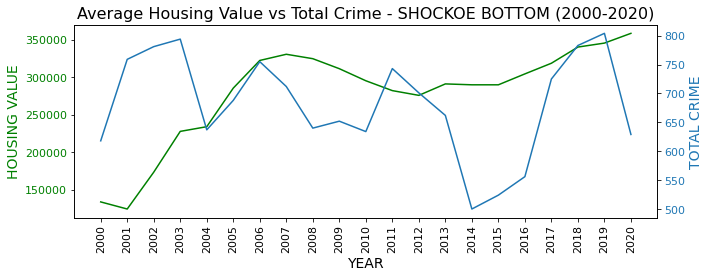

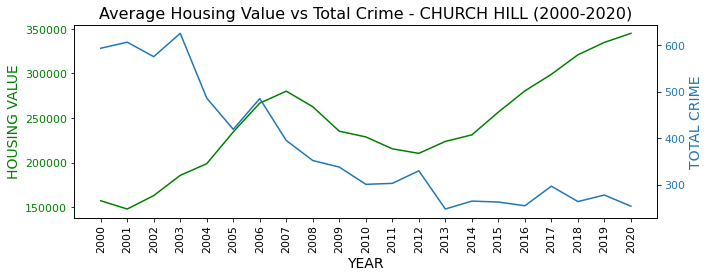

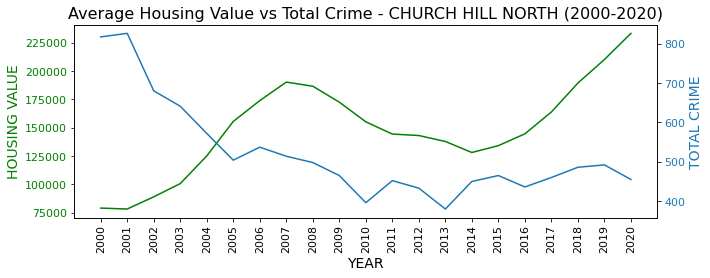

In [192]:
# Create comparative line graphs displaying Housing Value over time in one line and Total Crime in another
### --do this for All RVA and repeat for each neighborhood

#---- Comparative Line Graph for RICHMOND ----#

# Set up the plot figure and axes 
fig, ax = plt.subplots(figsize=(10,4))

# Create a variable for the Housing Value line plot
housing = ax.plot(allRVA_data['YEAR'],allRVA_data['AVERAGE_HOUSE_PRICE'],color='green',label='HOUSING VALUE')

# Grab the default line color for later
color = housing[0].get_color()

# Add appropriate title, axis and tick labels, legend, etc.
### --set the y-axis and ticks labels to match the color of the line
tick_locations = allRVA_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations,labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010",
                                  "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"],rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - ALL RICHMOND (2000-2020)', fontsize=16)

# Create a variable for the Total Crime line plot that uses the same x-axis
twinY = ax.twinx()
crime = twinY.plot(allRVA_data['YEAR'],allRVA_data['TOTAL_CRIME'],label='TOTAL CRIME')

# Grab the default line color, then add axis labels and ticks that match the line color
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

# Add tight layout for the figure
plt.tight_layout()

# Save the graph as a png and display in the terminal
plt.savefig('Output/Images/AvgHousingvsTotalCrimeALLRVA_line.png')
plt.show()

#---- Comparative Line Graph for MANCHESTER ----#

# Repeat same process done for All RVA...
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(manchester_data['YEAR'],manchester_data['AVERAGE_HOUSE_PRICE'],color='green',label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = manchester_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations,labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010",
                                  "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"],rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - MANCHESTER (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(manchester_data['YEAR'],manchester_data['TOTAL_CRIME'],label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.savefig('Output/Images/AvgHousingvsTotalCrimeMANCHESTER_line.png')
plt.show()

#---- Comparative Line Graph for OREGON HILL ----#

# Repeat same process done for All RVA...
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(oregon_hill_data['YEAR'],oregon_hill_data['AVERAGE_HOUSE_PRICE'],color='green',label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = oregon_hill_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations,labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010",
                                  "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"],rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - OREGON HILL (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(oregon_hill_data['YEAR'],oregon_hill_data['TOTAL_CRIME'],label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.savefig('Output/Images/AvgHousingvsTotalCrimeOREGONHILL_line.png')
plt.show()

#---- Comparative Line Graph for SCOTTS ADDITION ----#

# Repeat same process done for All RVA...
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(scotts_addition_data['YEAR'],scotts_addition_data['AVERAGE_HOUSE_PRICE'],color='green',label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = scotts_addition_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations,labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010",
                                  "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"],rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - SCOTTS ADDITION (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(scotts_addition_data['YEAR'],scotts_addition_data['TOTAL_CRIME'],label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.savefig('Output/Images/AvgHousingvsTotalCrimeSCOTTSADDITION_line.png')
plt.show()

#---- Comparative Line Graph for JACKSON WARD ----#

# Repeat same process done for All RVA...
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(jackson_ward_data['YEAR'],jackson_ward_data['AVERAGE_HOUSE_PRICE'],color='green',label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = jackson_ward_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations,labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010",
                                  "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"],rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - JACKSON WARD (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(jackson_ward_data['YEAR'],jackson_ward_data['TOTAL_CRIME'],label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.savefig('Output/Images/AvgHousingvsTotalCrimeJACKSONWARD_line.png')
plt.show()

#---- Comparative Line Graph for SHOCKOE BOTTOM ----#

# Repeat same process done for All RVA...
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(shockoe_bottom_data['YEAR'],shockoe_bottom_data['AVERAGE_HOUSE_PRICE'],color='green',label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = shockoe_bottom_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations,labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010",
                                  "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"],rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - SHOCKOE BOTTOM (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(shockoe_bottom_data['YEAR'],shockoe_bottom_data['TOTAL_CRIME'],label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.savefig('Output/Images/AvgHousingvsTotalCrimeSHOCKOEBOTTOM_line.png')
plt.show()

#---- Comparative Line Graph for CHURCH HILL ----#

# Repeat same process done for All RVA...
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(church_hill_data['YEAR'],church_hill_data['AVERAGE_HOUSE_PRICE'],color='green',label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = church_hill_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations,labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010",
                                  "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"],rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - CHURCH HILL (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(church_hill_data['YEAR'],church_hill_data['TOTAL_CRIME'],label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.savefig('Output/Images/AvgHousingvsTotalCrimeCHURCHHILL_line.png')
plt.show()

#---- Comparative Line Graph for CHURCH HILL NORTH ----#

# Repeat same process done for All RVA...
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(church_hill_north_data['YEAR'],church_hill_north_data['AVERAGE_HOUSE_PRICE'],color='green',
                  label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = church_hill_north_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations,labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010",
                                  "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"],rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - CHURCH HILL NORTH (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(church_hill_north_data['YEAR'],church_hill_north_data['TOTAL_CRIME'],label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.savefig('Output/Images/AvgHousingvsTotalCrimeCHURCHILLNORTH_line.png')
plt.show()

## Box and Whisker Plots 
Create box and whisker plots that compare the distribution of Housing Values and Total Crime for All RVA Neighborhoods in 2000 and 2020, and show on the plots where each neighborhood falls in the distributions.

In [136]:
# Display scatter_data for preview 
print(scatter_data.columns)
scatter_data

Index(['NEIGHBORHOOD_NAME', '2000_TOTAL_CRIME', '2000_AVERAGE_HOUSE_PRICE',
       '2010_TOTAL_CRIME', '2010_AVERAGE_HOUSE_PRICE', '2020_TOTAL_CRIME',
       '2020_AVERAGE_HOUSE_PRICE'],
      dtype='object')


,NEIGHBORHOOD_NAME,2000_TOTAL_CRIME,2000_AVERAGE_HOUSE_PRICE,2010_TOTAL_CRIME,2010_AVERAGE_HOUSE_PRICE,2020_TOTAL_CRIME,2020_AVERAGE_HOUSE_PRICE
0,BEAUFONT,81,91484,95,129220,80,179741
1,BELLEMEADE,846,60970,632,73785,484,110851
2,BELLEVUE,236,142984,106,242895,143,356034
3,BELMONT WOODS,28,119901,32,149921,16,199649
4,BELT CENTER,715,75425,417,106461,465,142836
...,...,...,...,...,...,...,...
117,WINDSOR FARMS,44,568122,18,837668,31,1098946
118,WOODHAVEN,122,75706,171,114064,126,155251
119,WOODLAND HEIGHTS,379,117137,315,222521,221,331597
120,WOODVILLE,142,138552,161,105910,139,144709


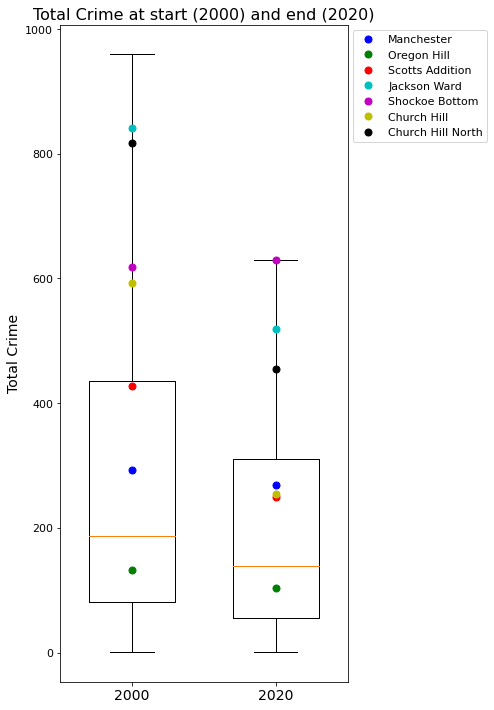

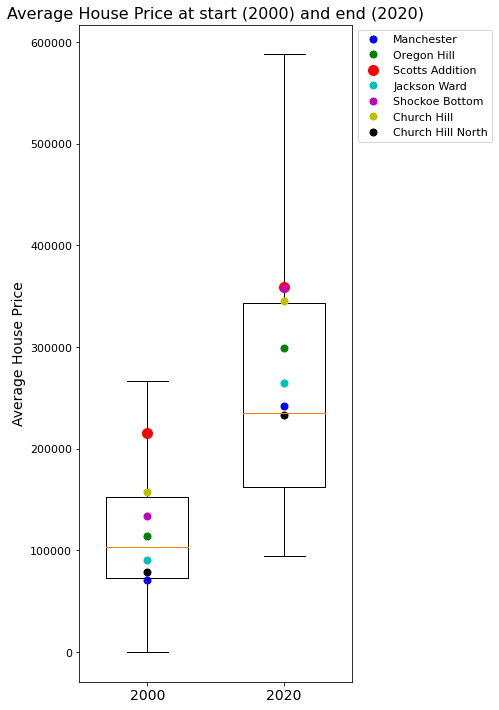

In [29]:
#---- Comparative Box and Whisker Plot for Total Crime at 2000 and 2020 ----#

# For each neighborhood, pull the Total Crime values at 2000 and 2020 
### --put them in list variables to plot later
manchester_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "MANCHESTER"), '2000_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "MANCHESTER"), '2020_TOTAL_CRIME'].values[0]]
oregon_hill_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "OREGON HILL"), '2000_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "OREGON HILL"), '2020_TOTAL_CRIME'].values[0]]
scotts_addition_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SCOTT'S ADDITION"), '2000_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SCOTT'S ADDITION"), '2020_TOTAL_CRIME'].values[0]]
jackson_ward_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "JACKSON WARD"), '2000_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "JACKSON WARD"), '2020_TOTAL_CRIME'].values[0]]
shockoe_bottom_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SHOCKOE BOTTOM"), '2000_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SHOCKOE BOTTOM"), '2020_TOTAL_CRIME'].values[0]]
church_hill_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL"), '2000_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL"), '2020_TOTAL_CRIME'].values[0]]
church_hill_north_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL NORTH"), '2000_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL NORTH"), '2020_TOTAL_CRIME'].values[0]]

# Set up the figure and axes, and plot the box plots
fig1, ax = plt.subplots(figsize=(7,10))
ax.boxplot([scatter_data['2000_TOTAL_CRIME'],scatter_data['2020_TOTAL_CRIME']],showfliers=False,widths=.6)

# Plot the values from each neighborhood list as points on each box plot
mc, = plt.plot(range(1,3),manchester_crime,'bo',ms=7)
ohc, = plt.plot(range(1,3),oregon_hill_crime,'go',ms=7)
sac, = plt.plot(range(1,3),scotts_addition_crime,'ro',ms=7)
jwc, = plt.plot(range(1,3),jackson_ward_crime,'co',ms=7)
sbc, = plt.plot(range(1,3),shockoe_bottom_crime,'mo',ms=7)
chc, = plt.plot(range(1,3),church_hill_crime,'yo',ms=7)
chnc, = plt.plot(range(1,3),church_hill_north_crime,'ko',ms=7)

# Add appropriate title, axis and tick labels, legend, etc. 
plt.xticks ([1,2],['2000','2020'],fontsize=14)
plt.legend(handles=[mc,ohc,sac,jwc,sbc,chc,chnc],
           labels=['Manchester','Oregon Hill','Scotts Addition','Jackson Ward',
                   'Shockoe Bottom','Church Hill','Church Hill North'],
           bbox_to_anchor=(1,1),loc='upper left',ncol=1)
plt.ylabel(('Total Crime'),fontsize=14)
plt.title((f'Total Crime at start (2000) and end (2020)'),fontsize=16)
plt.tight_layout()

# Save the graph as a png and display in the terminal
plt.savefig('Output/Images/TotalCrimeat2000and2020_boxwhisker.png')
plt.show()

#---- Comparative Box and Whisker Plot for Housing Value at 2000 and 2020 ----#

# Repeat same process done for Total Crime...
manchester_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "MANCHESTER"), '2000_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "MANCHESTER"), '2020_AVERAGE_HOUSE_PRICE'].values[0]]
oregon_hill_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "OREGON HILL"), '2000_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "OREGON HILL"), '2020_AVERAGE_HOUSE_PRICE'].values[0]]
scotts_addition_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SCOTT'S ADDITION"), '2000_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SCOTT'S ADDITION"), '2020_AVERAGE_HOUSE_PRICE'].values[0]]
jackson_ward_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "JACKSON WARD"), '2000_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "JACKSON WARD"), '2020_AVERAGE_HOUSE_PRICE'].values[0]]
shockoe_bottom_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SHOCKOE BOTTOM"), '2000_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SHOCKOE BOTTOM"), '2020_AVERAGE_HOUSE_PRICE'].values[0]]
church_hill_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL"), '2000_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL"), '2020_AVERAGE_HOUSE_PRICE'].values[0]]
church_hill_north_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL NORTH"), '2000_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL NORTH"), '2020_AVERAGE_HOUSE_PRICE'].values[0]]

fig, ax = plt.subplots(figsize=(7,10))
ax.boxplot([scatter_data['2000_AVERAGE_HOUSE_PRICE'],scatter_data['2020_AVERAGE_HOUSE_PRICE']],showfliers=False,widths=.6)
mh, = plt.plot(range(1,3),manchester_house,'bo',ms=7)
ohh, = plt.plot(range(1,3),oregon_hill_house,'go',ms=7)
sah, = plt.plot(range(1,3),scotts_addition_house,'ro',ms=10)
jwh, = plt.plot(range(1,3),jackson_ward_house,'co',ms=7)
sbh, = plt.plot(range(1,3),shockoe_bottom_house,'mo',ms=7)
chh, = plt.plot(range(1,3),church_hill_house,'yo',ms=7)
chnh, = plt.plot(range(1,3),church_hill_north_house,'ko',ms=7)
plt.xticks ([1,2],['2000','2020'],fontsize=14)
plt.legend(handles=[mh,ohh,sah,jwh,sbh,chh,chnh],
           labels=['Manchester','Oregon Hill','Scotts Addition','Jackson Ward',
                   'Shockoe Bottom','Church Hill','Church Hill North'],
           bbox_to_anchor=(1,1),loc='upper left',ncol=1)
plt.ylabel(('Average House Price'),fontsize=14)
plt.title((f'Average House Price at start (2000) and end (2020)'),fontsize=16)
plt.tight_layout()

plt.savefig('Output/Images/AvgHousePriceat2000and2020_boxwhisker.png')
plt.show()

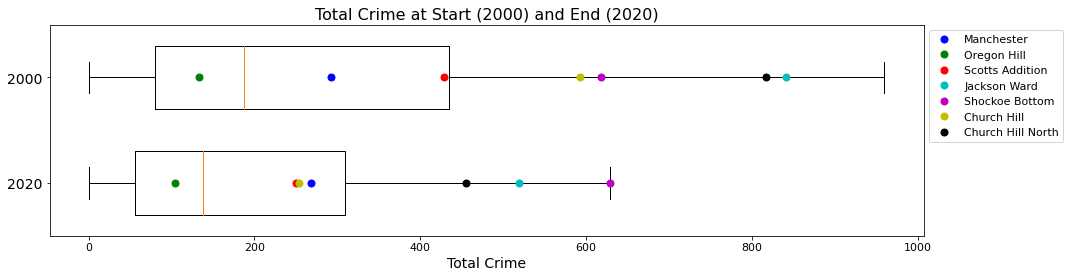

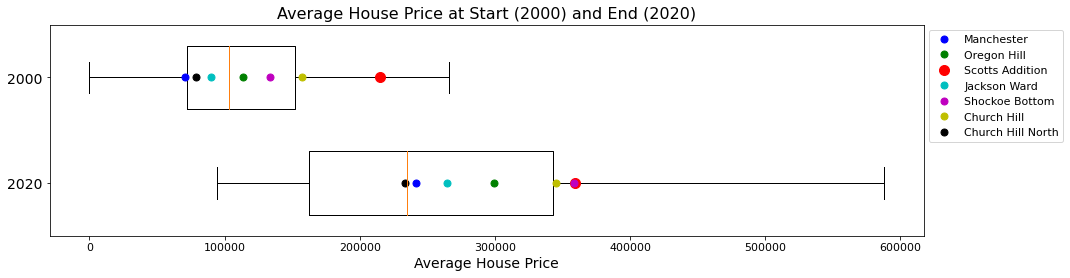

In [28]:
#---- Making the Comparative Box and Whisker Plots Horizontal ----#

# Repeat the process done to create the neighborhood value lists, but put 2020 value before 2000
manchester_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "MANCHESTER"), '2020_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "MANCHESTER"), '2000_TOTAL_CRIME'].values[0]]
oregon_hill_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "OREGON HILL"), '2020_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "OREGON HILL"), '2000_TOTAL_CRIME'].values[0]]
scotts_addition_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SCOTT'S ADDITION"), '2020_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SCOTT'S ADDITION"), '2000_TOTAL_CRIME'].values[0]]
jackson_ward_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "JACKSON WARD"), '2020_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "JACKSON WARD"), '2000_TOTAL_CRIME'].values[0]]
shockoe_bottom_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SHOCKOE BOTTOM"), '2020_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SHOCKOE BOTTOM"), '2000_TOTAL_CRIME'].values[0]]
church_hill_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL"), '2020_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL"), '2000_TOTAL_CRIME'].values[0]]
church_hill_north_crime = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL NORTH"), '2020_TOTAL_CRIME'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL NORTH"), '2000_TOTAL_CRIME'].values[0]]

# Repeat the process done to create the box plots, but put 2020 data before 2000 and set vert=False
fig1, ax = plt.subplots(figsize=(15,4))
ax.boxplot([scatter_data['2020_TOTAL_CRIME'],scatter_data['2000_TOTAL_CRIME']],vert=False,showfliers=False,widths=.6)

# Repeat the process done to create the neighborhood value points, but put the list variable before the range()
mc, = plt.plot(manchester_crime,range(1,3),'bo',ms=7)
ohc, = plt.plot(oregon_hill_crime,range(1,3),'go',ms=7)
sac, = plt.plot(scotts_addition_crime,range(1,3),'ro',ms=7)
jwc, = plt.plot(jackson_ward_crime,range(1,3),'co',ms=7)
sbc, = plt.plot(shockoe_bottom_crime,range(1,3),'mo',ms=7)
chc, = plt.plot(church_hill_crime,range(1,3),'yo',ms=7)
chnc, = plt.plot(church_hill_north_crime,range(1,3),'ko',ms=7)

# Repeat the process done to set the labels, ticks, and legend, but switch xticks to yticks, and ylabel to xlabel
plt.yticks ([1,2],['2020','2000'],fontsize=14)
plt.legend(handles=[mc,ohc,sac,jwc,sbc,chc,chnc],
           labels=['Manchester','Oregon Hill','Scotts Addition','Jackson Ward',
                   'Shockoe Bottom','Church Hill','Church Hill North'],
           bbox_to_anchor=(1,1),loc='upper left',ncol=1)
plt.xlabel(('Total Crime'),fontsize=14)
plt.title((f'Total Crime at Start (2000) and End (2020)'),fontsize=16)
plt.tight_layout()

# Save the graph as a png and display in the terminal
plt.savefig('Output/Images/TotalCrimeat2000and2020_boxwhisker2.png')
plt.show()

# Repeat for second graph...
manchester_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "MANCHESTER"), '2020_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "MANCHESTER"), '2000_AVERAGE_HOUSE_PRICE'].values[0]]
oregon_hill_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "OREGON HILL"), '2020_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "OREGON HILL"), '2000_AVERAGE_HOUSE_PRICE'].values[0]]
scotts_addition_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SCOTT'S ADDITION"), '2020_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SCOTT'S ADDITION"), '2000_AVERAGE_HOUSE_PRICE'].values[0]]
jackson_ward_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "JACKSON WARD"), '2020_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "JACKSON WARD"), '2000_AVERAGE_HOUSE_PRICE'].values[0]]
shockoe_bottom_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SHOCKOE BOTTOM"), '2020_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "SHOCKOE BOTTOM"), '2000_AVERAGE_HOUSE_PRICE'].values[0]]
church_hill_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL"), '2020_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL"), '2000_AVERAGE_HOUSE_PRICE'].values[0]]
church_hill_north_house = [scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL NORTH"), '2020_AVERAGE_HOUSE_PRICE'].values[0],
                   scatter_data.loc[(scatter_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL NORTH"), '2000_AVERAGE_HOUSE_PRICE'].values[0]]

fig, ax = plt.subplots(figsize=(15,4))
ax.boxplot([scatter_data['2020_AVERAGE_HOUSE_PRICE'],scatter_data['2000_AVERAGE_HOUSE_PRICE']],
           vert=False,showfliers=False,widths=.6)
mh, = plt.plot(manchester_house,range(1,3),'bo',ms=7)
ohh, = plt.plot(oregon_hill_house,range(1,3),'go',ms=7)
sah, = plt.plot(scotts_addition_house,range(1,3),'ro',ms=10)
jwh, = plt.plot(jackson_ward_house,range(1,3),'co',ms=7)
sbh, = plt.plot(shockoe_bottom_house,range(1,3),'mo',ms=7)
chh, = plt.plot(church_hill_house,range(1,3),'yo',ms=7)
chnh, = plt.plot(church_hill_north_house,range(1,3),'ko',ms=7)
plt.yticks ([1,2],['2020','2000'],fontsize=14)
plt.legend(handles=[mh,ohh,sah,jwh,sbh,chh,chnh],
           labels=['Manchester','Oregon Hill','Scotts Addition','Jackson Ward',
                   'Shockoe Bottom''Church Hill', 'Church Hill North'],
           bbox_to_anchor=(1,1), loc='upper left', ncol=1)
plt.xlabel(('Average House Price'),fontsize=14)
plt.title((f'Average House Price at Start (2000) and End (2020)'),fontsize=16)

plt.tight_layout()

plt.savefig('Output/Images/AvgHousePriceat2000and2020_boxwhisker2.png')
plt.show()

## Test of Significant Difference from Average (All RVA)

In [189]:
print(percent_Change_data.columns)
percent_Change_data

Index(['NEIGHBORHOOD_NAME', 'CRIME_PERCENT_CHANGE', 'HOUSING_PERCENT_CHANGE'], dtype='object')


,NEIGHBORHOOD_NAME,CRIME_PERCENT_CHANGE,HOUSING_PERCENT_CHANGE
0,BEAUFONT,-0.012346,0.964726
1,BELLEMEADE,-0.427896,0.818124
2,BELLEVUE,-0.394068,1.490027
3,BELMONT WOODS,-0.428571,0.665115
4,BELT CENTER,-0.349650,0.893749
...,...,...,...
115,WINDSOR FARMS,-0.295455,0.934349
116,WOODHAVEN,0.032787,1.050709
117,WOODLAND HEIGHTS,-0.416887,1.830848
118,WOODVILLE,-0.021127,0.044438


In [221]:
# Run a chi-square to compare overall % change (from 2000-2020) for each selected neighborhood to  % change across All RVA

neighborhoods = ['MANCHESTER','OREGON HILL',"SCOTT'S ADDITION",'JACKSON WARD',
                 'SHOCKOE BOTTOM','CHURCH HILL','CHURCH HILL NORTH']
#print(neighborhoods)

crime = [percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "MANCHESTER"), 'CRIME_PERCENT_CHANGE'].values[0],
            percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "OREGON HILL"), 'CRIME_PERCENT_CHANGE'].values[0],
            percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "SCOTT'S ADDITION"), 'CRIME_PERCENT_CHANGE'].values[0],
            percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "JACKSON WARD"), 'CRIME_PERCENT_CHANGE'].values[0],
            percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "SHOCKOE BOTTOM"), 'CRIME_PERCENT_CHANGE'].values[0],
            percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL"), 'CRIME_PERCENT_CHANGE'].values[0],
            percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL NORTH"), 'CRIME_PERCENT_CHANGE'].values[0]]
#print(crime)

house = [percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "MANCHESTER"), 'HOUSING_PERCENT_CHANGE'].values[0],
            percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "OREGON HILL"), 'HOUSING_PERCENT_CHANGE'].values[0],
            percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "SCOTT'S ADDITION"), 'HOUSING_PERCENT_CHANGE'].values[0],
            percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "JACKSON WARD"), 'HOUSING_PERCENT_CHANGE'].values[0],
            percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "SHOCKOE BOTTOM"), 'HOUSING_PERCENT_CHANGE'].values[0],
            percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL"), 'HOUSING_PERCENT_CHANGE'].values[0],
            percent_Change_data.loc[(percent_Change_data["NEIGHBORHOOD_NAME"] == "CHURCH HILL NORTH"), 'HOUSING_PERCENT_CHANGE'].values[0]]
#print(house)

###---- Chi-Square for Total Crime ----###

observed_crime = pd.Series(crime, index=neighborhoods)
#print(observed_crime)

# Expected value = -0.3799256817752399
chi_crime_df = pd.DataFrame([observed_crime]).T
chi_crime_df[1] = -0.3799256817752399
chi_crime_df.columns = ["observed", "expected"] 
print(chi_crime_df)

crime_chiScore = st.chisquare(chi_crime_df['observed'], chi_crime_df['expected'])
print(crime_chiScore)

###---- Chi-Square for Housing Value ----###

observed_house = pd.Series(house, index=neighborhoods)
#print(observed_house)

# Expected value = 1.28864947165471
chi_house_df = pd.DataFrame([observed_house]).T
chi_house_df[1] = 1.28864947165471
chi_house_df.columns = ["observed", "expected"] 
print(chi_house_df)

# The degree of freedom is 7-1 = 6
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = st.chi2.ppf(q = 0.95, df = 6)
print(f'The critical value is {critical_value}')

house_chiScore = st.chisquare(chi_house_df['observed'], chi_house_df['expected'])
print(house_chiScore)


### --DETERMINED THAT CHI-SQUARE WAS NOT THE APPROPRIATE SIGNIFICANCE TEST

                   observed  expected
MANCHESTER        -0.082192 -0.379926
OREGON HILL       -0.218045 -0.379926
SCOTT'S ADDITION  -0.415888 -0.379926
JACKSON WARD      -0.382878 -0.379926
SHOCKOE BOTTOM     0.017799 -0.379926
CHURCH HILL       -0.571669 -0.379926
CHURCH HILL NORTH -0.443084 -0.379926
                   observed  expected
MANCHESTER         2.411108  1.288649
OREGON HILL        1.627806  1.288649
SCOTT'S ADDITION   0.667880  1.288649
JACKSON WARD       1.933421  1.288649
SHOCKOE BOTTOM     1.683145  1.288649
CHURCH HILL        1.197062  1.288649
CHURCH HILL NORTH  1.951942  1.288649
The critical value is 12.591587243743977
Power_divergenceResult(statistic=-0.8293535218520748, pvalue=1.0)
Power_divergenceResult(statistic=2.1572938957915317, pvalue=0.904678624207802)
